In [1]:
#importing libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# <font color='blue' >Data Loading</font>

In [2]:
test = pd.read_csv('./test.csv')
X_test = test.copy()

In [3]:
train = pd.read_csv('./train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<b>
<ul>
    <li>survival ->   Survival	    0 = No, 1 = Yes </li>
    <li>pclass   ->	  Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd</li>
    <li>sex      ->	  Sex</li>
    <li>Age      ->	  Age in years	</li>
    <li>sibsp	 ->   # of siblings / spouses aboard the Titanic	</li>
    <li>parch	 ->   # of parents / children aboard the Titanic</li>
    <li>ticket	 ->   Ticket number	</li>
    <li>fare	 ->   Passenger fare</li>
    <li>cabin	 ->   Cabin number</li>
    <li>embarked ->   Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton</li>
</ul>
</b>

# <font color='green' >Data Visualization</font>

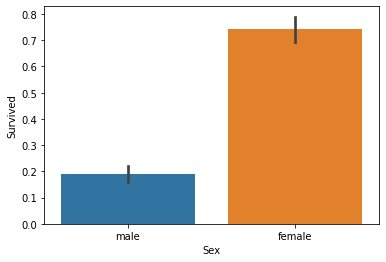

In [6]:
# Bar Graph -> for 'Sex' feature

sns.barplot(x='Sex', y='Survived', data=train)
plt.show()

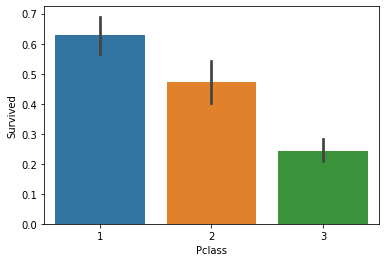

In [7]:
# Bar Graph -> for 'Pclass' feature

sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

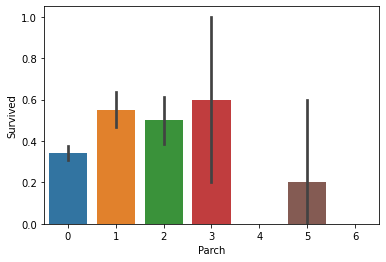

In [8]:
# Bar Graph -> for 'Parch' feature

sns.barplot(x='Parch', y='Survived', data=train)
plt.show()

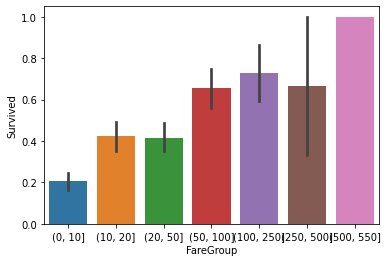

In [9]:
# Fare Visualization

bins = [0,10,20,50,100,250,500,550]
train["FareGroup"]=pd.cut(train["Fare"],bins)

sns.barplot(x="FareGroup",y="Survived",data=train)
plt.show()

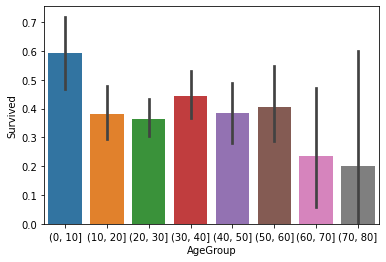

In [10]:
# Age Visualization

bins = [0,10,20,30,40,50,60,70,80]
train["AgeGroup"]=pd.cut(train["Age"],bins)

sns.barplot(x="AgeGroup",y="Survived",data=train)
plt.show()

# Data Cleaning

In [11]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareGroup,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(0, 10]","(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(50, 100]","(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(0, 10]","(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(50, 100]","(30.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(0, 10]","(30.0, 40.0]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,"(0, 10]",NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50, 100]","(50.0, 60.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(20, 50]","(0.0, 10.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(10, 20]","(20.0, 30.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(20, 50]","(10.0, 20.0]"


In [12]:
# Dropping the features that are not important  

X_train = train.drop(['PassengerId','AgeGroup','Survived','Name', 'Ticket','Cabin','Parch','Embarked','SibSp','FareGroup'], axis = 'columns')

X_test.drop(['PassengerId','Name', 'Ticket','Cabin','Parch','Embarked','SibSp'], axis = 'columns',inplace= True)

In [13]:
X_test

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,NaN,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,NaN,8.0500


In [14]:
Y_train = train['Survived']

In [15]:
X_train

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [16]:
# checking for any NaN 

X_train.isna().any() ,Y_train.isna().any() , X_test.isna().any()

(Pclass    False
 Sex       False
 Age        True
 Fare      False
 dtype: bool,
 False,
 Pclass    False
 Sex       False
 Age        True
 Fare       True
 dtype: bool)

In [17]:
# Replacing NaN in age by its mean

X_train['Age'].fillna(X_train['Age'].mean(), inplace = True)

X_test['Age'].fillna(X_test['Age'].mean(),inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(),inplace=True)

In [18]:
X_test.isna().any()

Pclass    False
Sex       False
Age       False
Fare      False
dtype: bool

In [19]:
# To convert Sex (Male/Female to 0/1)

from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [20]:
X_train['Gender'] = le.fit_transform(X_train['Sex']) 
X_train.drop(['Sex'],axis = 'columns',inplace=True)

X_test['Gender'] = le.fit_transform(X_test['Sex']) 
X_test.drop(['Sex'],axis = 'columns',inplace=True)

X_train.head(5), X_test.head(5)

(   Pclass   Age     Fare  Gender
 0       3  22.0   7.2500       1
 1       1  38.0  71.2833       0
 2       3  26.0   7.9250       0
 3       1  35.0  53.1000       0
 4       3  35.0   8.0500       1,
    Pclass   Age     Fare  Gender
 0       3  34.5   7.8292       1
 1       3  47.0   7.0000       0
 2       2  62.0   9.6875       1
 3       3  27.0   8.6625       1
 4       3  22.0  12.2875       0)


# Model Fitting


###  <font color='orange' >a. Logistic Regression</font>

In [21]:
# using Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [22]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [23]:
# Score on training data
clf.score(X_train,Y_train)

0.8002244668911336

In [24]:
Y_test = clf.predict(X_test)

In [25]:
Y_test.shape

(418,)

In [26]:
#set index as PassengerId and predict survival 

index = test['PassengerId']
output = pd.DataFrame({ 'PassengerId' : index, 'Survived': Y_test })
output.to_csv('LogisticRegression_predictions.csv', index=False)

###  <font color='orange' >b. Random Forest</font>

In [27]:
# using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10 , max_depth = 5)

In [28]:
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [29]:
# cross val score to avoid overfitting 

from sklearn.model_selection import cross_val_score

In [30]:
score_list = []
for i in range(1,50):
    score_list.append(cross_val_score(RandomForestClassifier(n_estimators = i, max_depth = 5),X_train,Y_train).mean())

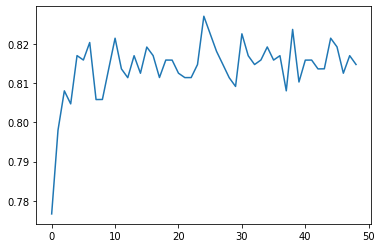

In [31]:
plt.plot(score_list)
plt.show()

In [32]:
cross_val_score(RandomForestClassifier(n_estimators = np.argmax(score_list), max_depth = 5),X_train,Y_train).mean()

0.8181909484652564

In [33]:
Y_test = rf.predict(X_test)

In [34]:
Y_test.shape

(418,)

In [35]:
final = pd.DataFrame({ 'PassengerId' : index, 'Survived': Y_test})

In [36]:
final.to_csv('RandomForest_predictions.csv', index=False)